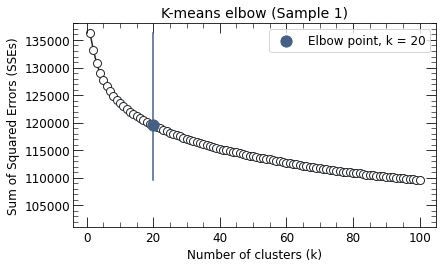

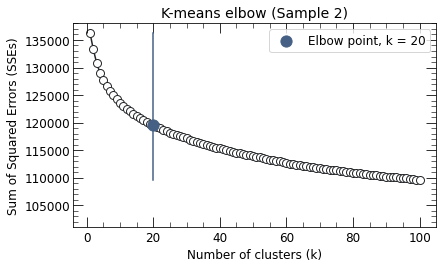

In [1]:
# This notebook was used to visualize K-means elbows for Sample 1 & 2

# Import required libraries and set basic parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Read the file containing Sum of Squared Errors (SSEs) data for each sample as obtained from the previous step
df = pd.read_csv("SamplesSSEs.csv")

# Load the dataframe columns into different variables for further use
x = df['k'].dropna()
y = df['sample1'].dropna()

x2 = df['k'].dropna()
y2 = df['sample2'].dropna()

x0 = df["sample1"][19]
y0 = df["sample2"][19]

# Seaborn color formatting
colors=sns.dark_palette("#69d",3)


# Define a funtion to plot Elbow charts for Sample 1 and 2
def plotElbow(sampNo = 1):     # Defualt value of "sampNo" ie sample number is 1
    
    # Set the input data variables according to the Sample number selected
    if sampNo == 1:
        b = x0
        m = x
        n = y
    elif sampNo == 2:
        b = y0
        m = x2
        n = y2
    else:
        print("Sample number exceeds the limit of 2!")
        return
    
    # Plot
    fig = plt.figure(1, figsize=(6.5, 3.75))
    plt.scatter(20, b, s=125, marker='o', color=colors[1], label='Elbow point, k = 20', zorder=3) # plot data
    plt.plot([20 for i in range(100)], n, linestyle='-', color=colors[1], mfc='w', zorder=2) # plot data
    plt.plot(m, n, linestyle='-', marker='o', color=colors[0], mfc='w', markersize=8, zorder=1) # plot data

    # Plot parameters
    plt.ylim([101000,138000])
    plt.minorticks_on()
    plt.tick_params(labelsize=12)
    plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
    plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=True, left=True, right=True)
    plt.tick_params(direction='in',which='major', length=10, bottom=True, top=True, left=True, right=True)
    plt.xlabel(r'Number of clusters (k)', fontsize=12) 
    plt.ylabel(r'Sum of Squared Errors (SSEs)',fontsize=12)  # label the y axis
    plt.legend(fontsize=12)  # add the legend (will default to 'best' location)
    plt.title(label=f"K-means elbow (Sample {sampNo})", fontsize=14)
    
    # Save a copy on the local disk and show the output
    plt.savefig(f'./Plots/ElbowSample{sampNo}.png', dpi=1200, bbox_inches="tight")
    plt.show()

    
# Plot the Elbow charts for Sample 1 & 2 and save the .png files to the local disk
plotElbow()
plotElbow(sampNo=2)